In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
df = pd.read_csv("/content/uber.csv")

In [172]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [173]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [174]:
df = df.drop("Unnamed: 0",axis = 1)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [176]:
df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [177]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [178]:
columns_with_missing_value = [features for features in df.columns if df[features].isnull().sum()>0]
print(columns_with_missing_value)

['dropoff_longitude', 'dropoff_latitude']


In [179]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [180]:
# seprating pickup_datetime into different columns


df["Month"] = df["pickup_datetime"].str.split("-").str[1]
df["Year"] = df["pickup_datetime"].str.split("-").str[0]


df["Date"] = df["pickup_datetime"].str.split(" ").str[0].str.split("-").str[2]

df = df.drop("pickup_datetime",axis = 1)


In [181]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,Year,Date
0,52:06.0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,05,2015,07
1,04:56.0,7.7,-73.994355,40.728225,-73.994710,40.750325,1,07,2009,17
2,45:00.0,12.9,-74.005043,40.740770,-73.962565,40.772647,1,08,2009,24
3,22:21.0,5.3,-73.976124,40.790844,-73.965316,40.803349,3,06,2009,26
4,47:00.0,16.0,-73.925023,40.744085,-73.973082,40.761247,5,08,2014,28


### LabelEncoding of Data Set

In [182]:
from sklearn.preprocessing import LabelEncoder

In [183]:
labelEncoder = LabelEncoder()

In [184]:
col = ["pickup_longitude","pickup_latitude",	"dropoff_longitude","dropoff_latitude"]

for i in col:
  df[i] = labelEncoder.fit_transform(df[i])

In [185]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,Year,Date
0,52:06.0,7.5,12319,29255,13392,20383,1,05,2015,07
1,04:56.0,7.7,17342,20389,17713,44355,1,07,2009,17
2,45:00.0,12.9,7625,31607,49440,66953,1,08,2009,24
3,22:21.0,5.3,36531,77259,47174,84966,3,06,2009,26
4,47:00.0,16.0,63904,34916,40100,55808,5,08,2014,28


In [186]:
df.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Month',
       'Year', 'Date'],
      dtype='object')

In [187]:
# converting key into Hours mins and seconds
df["Hours"] = df["key"].str.split(":")[0][0]
df["Mins"] = df["key"].str.split(":")[1][1]
df["seconds"] = df["Mins"].str.split(".")[1][1]

# converting seconds into int values by spliting
df["Mins"] = df["Mins"].str.split(".", expand=True)[0]


In [188]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,Year,Date,Hours,Mins,seconds
0,52:06.0,7.5,12319,29255,13392,20383,1,05,2015,07,52,56,0
1,04:56.0,7.7,17342,20389,17713,44355,1,07,2009,17,52,56,0
2,45:00.0,12.9,7625,31607,49440,66953,1,08,2009,24,52,56,0
3,22:21.0,5.3,36531,77259,47174,84966,3,06,2009,26,52,56,0
4,47:00.0,16.0,63904,34916,40100,55808,5,08,2014,28,52,56,0


In [189]:
df = df.drop(["key","seconds"],axis = 1)

In [190]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,Year,Date,Hours,Mins
0,7.5,12319,29255,13392,20383,1,05,2015,07,52,56
1,7.7,17342,20389,17713,44355,1,07,2009,17,52,56
2,12.9,7625,31607,49440,66953,1,08,2009,24,52,56
3,5.3,36531,77259,47174,84966,3,06,2009,26,52,56
4,16.0,63904,34916,40100,55808,5,08,2014,28,52,56


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  int64  
 2   pickup_latitude    200000 non-null  int64  
 3   dropoff_longitude  200000 non-null  int64  
 4   dropoff_latitude   200000 non-null  int64  
 5   passenger_count    200000 non-null  int64  
 6   Month              200000 non-null  object 
 7   Year               200000 non-null  object 
 8   Date               200000 non-null  object 
 9   Hours              200000 non-null  object 
 10  Mins               200000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 16.8+ MB


In [192]:
# Converting Data type into Int values


df['Month'] = df["Month"].astype(int)
df['fare_amount'] = df["fare_amount"].astype(int)
df['Year'] = df["Year"].astype(int)
df['Date'] = df["Date"].astype(int)
df['Hours'] = df["Hours"].astype(int)
df['Mins'] = df["Mins"].astype(int)


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [194]:
X = df.drop("fare_amount",axis = 1)
y = df['fare_amount']

X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.35,random_state = 42)

In [195]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error



models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor' : GradientBoostingRegressor(random_state=42),
       'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42)
}

In [196]:
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)

  print(f'{name} Mean Absolute Error: {mae:.2f}')

RandomForest Mean Absolute Error: 2.11
GradientBoostingRegressor Mean Absolute Error: 2.94
AdaBoostRegressor Mean Absolute Error: 8.05
XGBRegressor Mean Absolute Error: 2.15
LinearRegression Mean Absolute Error: 5.73
DecisionTreeRegressor Mean Absolute Error: 2.88


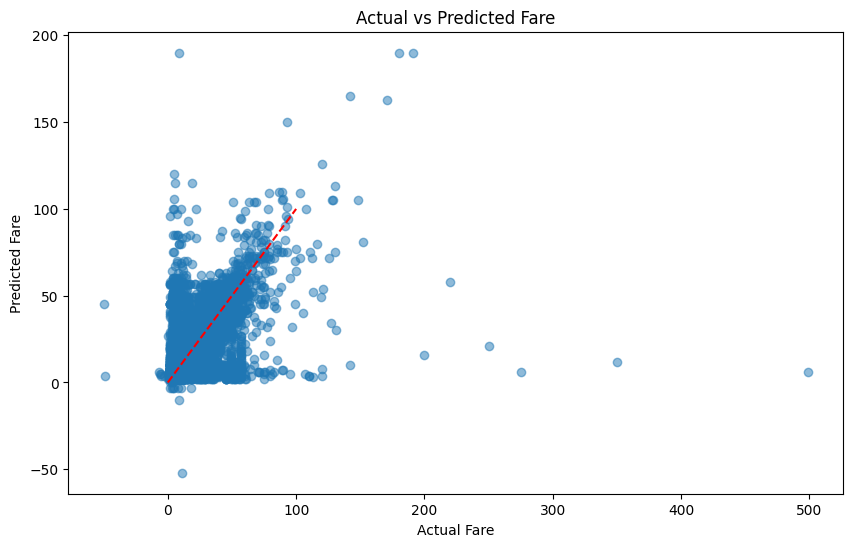

In [197]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.show()